## 타이타닉 데이터셋 도전

- 승객의 나이, 성별, 승객 등급, 승선 위치 같은 속성을 기반으로 하여 승객의 생존 여부를 예측하는 것이 목표

- [캐글](https://www.kaggle.com)의 [타이타닉 챌린지](https://www.kaggle.com/c/titanic)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 titanic_train.csv titanic_test.csv로 저장

## 1. 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 데이터 적재

In [2]:
titanic = pd.read_csv('./datasets/titanic_train.csv')

#### 1.2 titanic_df 살펴보기

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Survived**: 타깃. 0은 생존하지 못한 것이고 1은 생존을 의미
* **Pclass**: 승객 등급. 1, 2, 3등석.
* **Name**, **Sex**, **Age**: 이름 그대로의 의미
* **SibSp**: 함께 탑승한 형제, 배우자의 수
* **Parch**: 함께 탑승한 자녀, 부모의 수
* **Ticket**: 티켓 아이디
* **Fare**: 티켓 요금 (파운드)
* **Cabin**: 객실 번호
* **Embarked**: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)


#### 1.3 누락 데이터 살펴보기

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 1.4 통계치 살펴보기

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### 1.5 Survived 컬럼 값의 빈도수 확인

In [10]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 1.6 범주형(카테고리) 특성들의 빈도수 확인
- **Pclass**, **Sex**, **Embarked**
- **Embarked** 특성은 승객이 탑승한 곳 : C=Cherbourg, Q=Queenstown, S=Southampton.

In [12]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

#### 1.7 Name과 Age 열 을 Age 순으로 정렬해서 보기

In [17]:
titanic[['Name', 'Age']].sort_values(by='Age')

,Name,Age
803,"Thomas, Master. Assad Alexander",0.42
755,"Hamalainen, Master. Viljo",0.67
644,"Baclini, Miss. Eugenie",0.75
469,"Baclini, Miss. Helene Barbara",0.75
78,"Caldwell, Master. Alden Gates",0.83
...,...,...
859,"Razi, Mr. Raihed",NaN
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN
868,"van Melkebeke, Mr. Philemon",NaN
878,"Laleff, Mr. Kristo",NaN


#### 1.8 나이(Age)가 60 이상인 사람들의 Name과 Age 확인해 보기

In [21]:
# option 1
titanic[titanic['Age'] >= 60][['Name', 'Age']]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0


In [23]:
# option 2
titanic.loc[titanic['Age'] >= 60, ['Name', 'Age']]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0


#### 1.9 나이가(Age)가 60 이상이고 1등석에 탔으며 여성인 탑승자 확인해 보기

In [27]:
titanic[(titanic['Age'] >= 60) & (titanic['Pclass'] == 1) &(titanic['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


#### 1.10 요금(Fare)의 최대값 최소값 확인해 보기

In [28]:
titanic['Fare'].min()

0.0

In [29]:
titanic['Fare'].max()

512.3292

#### 1.11 등급(Pcalss) 그룹별 생존률 확인해보기

In [ ]:
# select mean(Survived), mean(PassengerId), mean(Age), .......
#   from titanic
#   group by Pclass

In [31]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [32]:
titanic.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**참고**

In [33]:
titanic.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [34]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# select Pclass, Survived, count(*)
#   from titanic
#   group by Pclass, Survived

In [36]:
titanic.groupby(['Pclass', 'Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [37]:
136/(80+136)  # 0.629630 : 1등석의 생존률

0.6296296296296297

**참고** 멀티인덱스 데이터의 unstack(), stack(), reset_index()

In [39]:
t = titanic.groupby(['Pclass', 'Survived']).size()
t

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [40]:
t.unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [41]:
t.unstack().stack()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [42]:
t.unstack().stack().reset_index()

,Pclass,Survived,0
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


## 2. 데이터 전처리 (누락 데이터 처리, 범주화 등)

#### 2.1 Cabin 열 : 전체 삭제하기

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# option 1
titanic.drop('Cabin', axis='columns') # 열을 삭제

In [ ]:
# option 2
titanic.dropna(thresh=600, axis='columns') # not null인 값이 600건 이상인 데이터만 남기도 나머지 열은 삭제

#### 2.2  Embarked 열 : 누락데이터를 승선도시 최고 빈도수 값으로 대체하기

In [47]:
titanic['Embarked'].isnull().sum()

2

In [49]:
sr = titanic['Embarked'].value_counts(dropna=False)
sr

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
# numpy에서 가장 큰값의 index 를 구하는 함수 argmax
# pandas에서 가장 큰값의 index를 구하는 함수 idxmax

In [51]:
most_freq = sr.idxmax()

In [52]:
titanic['Embarked'].fillna(most_freq)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

#### 2.3  Age 열 : 누락된 값을 중간값으로 대체하기

In [55]:
median_age = titanic['Age'].median()
median_age

28.0

In [57]:
titanic['Age'].fillna(median_age, inplace= True)

In [58]:
titanic['Age'].isnull().sum()

0

#### 2.4  Age 열: 범주로 나눠보기

* 0~18세
* 19~25세
* 26~35세
* 36~60세
* 61~80세

In [62]:
bins = [0, 18, 25, 35, 60, 80]
group_names = ['Children', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [65]:
age_cats = pd.cut(titanic['Age'], bins, labels=group_names)
age_cats # ( : 포함, ] : 포함안됨

0           Youth
1      MiddleAged
2      YoungAdult
3      YoungAdult
4      YoungAdult
          ...    
886    YoungAdult
887         Youth
888    YoungAdult
889    YoungAdult
890    YoungAdult
Name: Age, Length: 891, dtype: category
Categories (5, object): ['Children' < 'Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

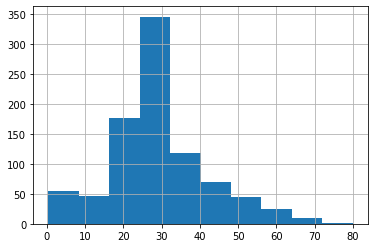

In [72]:
titanic['Age'].hist(bins=10)

In [ ]:
titanic['AgeCat'] = age_cats
titanic.head()

In [73]:
titanic['AgeCat'].value_counts()

YoungAdult    373
MiddleAged    195
Youth         162
Children      139
Senior         22
Name: AgeCat, dtype: int64

In [75]:
titanic.groupby('AgeCat').mean()['Survived']

AgeCat
Children      0.503597
Youth         0.333333
YoungAdult    0.361930
MiddleAged    0.400000
Senior        0.227273
Name: Survived, dtype: float64

In [ ]:
# 범주형 데이터에 대한 수치형 데이터를 확인할 때 (barplot, boxplot, pointplot, ...)

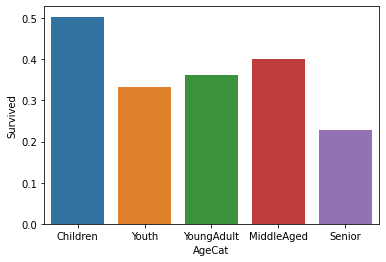

In [77]:
sns.barplot(data=titanic, x='AgeCat', y='Survived', ci=None)

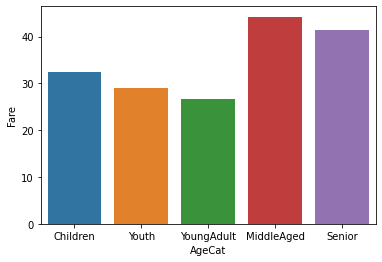

In [78]:
sns.barplot(data=titanic, x='AgeCat', y='Fare', ci=None)

* 범주 데이터를 dummy 변수로 바꿔보기 (One-Hot Encoding)

In [ ]:
#AgeCat, Pclass, Embarked, Sex

In [82]:
Pclass_dummies = pd.get_dummies(titanic['Pclass'], prefix='Pclass')
Embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
Sex_dummies = pd.get_dummies(titanic['Sex'], prefix='Sex')

In [ ]:
pd.concat([titanic,Pclass_dummies, Embarked_dummies, Sex_dummies], axis=1)

#### 2.5 중복 데이터 확인

In [86]:
titanic.duplicated().sum()

0